In [148]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.integrate import tplquad,dblquad,quad
from scipy import integrate
from scipy import optimize

In [149]:
data = pd.read_csv("DM_profile_contracted.csv",header=None) 
data.columns=["c1","c2"]
x=data["c1"]
x=np.array(x)
y=data["c2"]
y=np.array(y)
x1=np.log10(x)       #polynominal fitting under log scale
y1=np.log10(y)


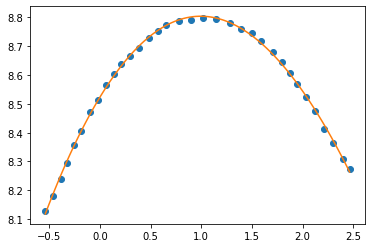

In [150]:
plt.plot(x1, y1, "o")

def f1(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

popt, pcov=optimize.curve_fit(f1, x1, y1)

x2 = np.linspace(x1.min(),x1.max(),100)
a1,b1,c1,d1=popt
y2=a1*x2**3+b1*x2**2+c1*x2+d1
plt.plot(x2, y2)


In [145]:
D=8#kpc
def rho_g0(r1,b,l):
    def r(r1):
        return np.sqrt(r1**2+2*r1*D*np.sin(b)*np.cos(l)+D**2)#coordinate transformation
    return 10**(a1*r(r1)**3+b1*r(r1)**2+c1*r(r1)+d1)/r(D)**2

#to calculate the column density, I think the specific distant should be given



In [144]:
#I tried to calculate the column density with respect to distance, 
#but it was very time consuming
cd=np.array([])
for i in range(1,10):
    M0, err = integrate.tplquad(rho_g0, 0, i, 0, np.pi, 0, 2*np.pi)
    cd0=M0/(4*np.pi*i**2)
    cd=np.append(cd,cd0)

/Users/zkw/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:865: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)
/Users/zkw/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:865: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)
/Users/zkw/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:865: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the

KeyboardInterrupt: 